# Implementation Exercise: Regularization in Practice
## Objective
Learn how to implement regularization techniques, such as L1/L2 regularization and Dropout, in neural networks to prevent overfitting.

## Setup
Begin by importing the necessary libraries and preparing a dataset. For simplicity, we'll continue using a synthetic dataset for a binary classification task.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

# Preprocess the dataset: Predicting wine quality (binary classification: good or bad)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Splitting the data into features and target
X = data.drop('quality', axis=1)
y = data['quality'].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Define the Base Neural Network Model
Create a function to build a simple neural network model without regularization. This will serve as our baseline for comparison.

In [2]:
from tensorflow.keras import regularizers

def build_base_model():
    model = tf.keras.models.Sequential([ # there are more regulizers, but kernel seems to be the relevant one here for the weights
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

build_base_model()

## Implement L1/L2 Regularization
Add L1 and/or L2 regularization to the model. Modify the build_base_model function to include L1/L2 regularization in the dense hidden layers. hint: check the kernel_regularizer parameter in the tf.keras.layers.Dense

In [3]:
# TASK: Modify this function to include L1 or L2 regularization
from tensorflow.keras import regularizers

def build_regularized_l1_model(l1):
    model = tf.keras.models.Sequential([ # there are more regulizers, but kernel seems to be the relevant one here for the weights
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,), kernel_regularizer=regularizers.l1(l1)),
        tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l1(l1)),
        tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(l1))
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

build_regularized_l1_model(0.01)

def build_regularized_l2_model(l2):
    model = tf.keras.models.Sequential([ # there are more regulizers, but kernel seems to be the relevant one here for the weights
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,), kernel_regularizer=regularizers.l2(l2)),
        tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(l2))
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

build_regularized_l2_model(0.01)

## Implement Dropout
Incorporate Dropout into the neural network. Modify the build_base_model function to add Dropout layers after each hidden layer. hint: tf.keras.layers.Dropout

In [4]:
# TASK: Modify this function to include Dropout

def build_dropout_model(dropout):
    model = tf.keras.models.Sequential([ # there are more regulizers, but kernel seems to be the relevant one here for the weights
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dropout(dropout), # input layer is not dropped (apparently, might have to ask Roberto about this)
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

build_dropout_model(0.2) # 20% of the neurons will be "turned off" during training

## Train and Evaluate Models
Train and evaluate the base model, the regularized model, and the dropout model. Compare their performance.

In [7]:
# Training and evaluation helper function
def train_and_evaluate(model, epochs=500):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_accuracy

# Base model
base_model = build_base_model()
base_history, base_loss, base_accuracy = train_and_evaluate(base_model)

# L1
regularized_model_l1 = build_regularized_l1_model(l1=0.01)
reg_history_l1, reg_loss_l1, reg_accuracy_l1 = train_and_evaluate(regularized_model_l1)

# L2
regularized_model_l2 = build_regularized_l2_model(l2=0.01)
reg_history_l2, reg_loss_l2, reg_accuracy_l2 = train_and_evaluate(regularized_model_l2)

# Dropout model
dropout_model = build_dropout_model(dropout=0.2)
drop_history, drop_loss, drop_accuracy = train_and_evaluate(dropout_model)


## Visualization and Analysis
Plot the training and validation accuracy of each model to compare their performance.

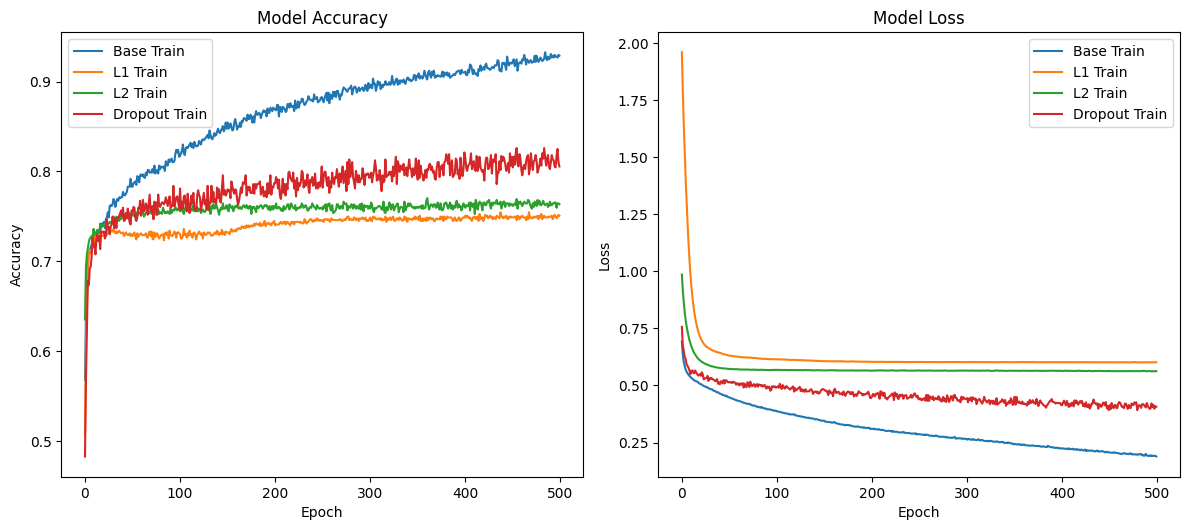

In [13]:
import matplotlib.pyplot as plt

# Training and evaluation helper function
def train_and_evaluate(model, epochs=500):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_accuracy

# Assuming you've already trained your models here...

# Plotting
plt.figure(figsize=(12, 10))

# Plot for accuracy
plt.subplot(2, 2, 1)
plt.plot(base_history.history['accuracy'], label='Base Train')
plt.plot(reg_history_l1.history['accuracy'], label='L1 Train')
plt.plot(reg_history_l2.history['accuracy'], label='L2 Train')
plt.plot(drop_history.history['accuracy'], label='Dropout Train')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plot for loss
plt.subplot(2, 2, 2)
plt.plot(base_history.history['loss'], label='Base Train')
plt.plot(reg_history_l1.history['loss'], label='L1 Train')
plt.plot(reg_history_l2.history['loss'], label='L2 Train')
plt.plot(drop_history.history['loss'], label='Dropout Train')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


## Tasks and Questions
1. Implement L1/L2 regularization and Dropout in the provided model structures.
2. Implement the visualizations.
3. Observe the effect of each technique on model performance.
4. Discuss which regularization technique seemed most effective and why.
## Conclusion
Reflect on the importance of regularization techniques in training neural networks and their impact on model performance and generalization